<a href="https://colab.research.google.com/github/ksujith/sujithkumarreddy_INFO5731_Spring2025/blob/main/Khristipati_Sujith_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

In [ ]:
# Dataset Collection & Preparation
import pandas as pd

# Load the dataset provided by the user
file_path = '/content/sentimentanalysis.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


(None,
        textID                                               text  \
 0  cb774db0d1                I`d have responded, if I were going   
 1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
 2  088c60f138                          my boss is bullying me...   
 3  9642c003ef                     what interview! leave me alone   
 4  358bd9e861   Sons of ****, why couldn`t they put them on t...   
 
                          selected_text sentiment  
 0  I`d have responded, if I were going   neutral  
 1                             Sooo SAD  negative  
 2                          bullying me  negative  
 3                       leave me alone  negative  
 4                        Sons of ****,  negative  )

1. Dataset Collection & Preparation

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle class imbalance if needed.

In [ ]:
print(data.shape)
print('So We have 27486 tweets in the data set ')


(27481, 4)
So We have 27486 tweets in the data set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None


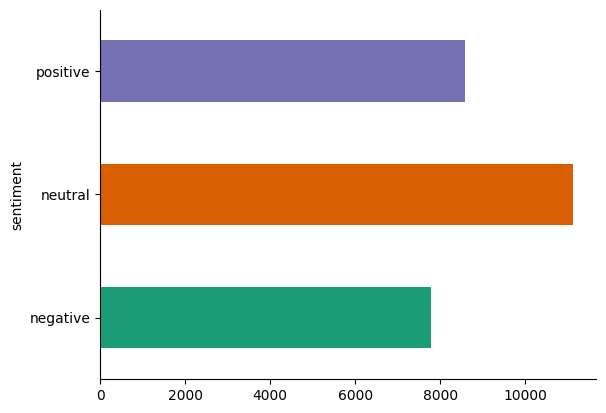

In [ ]:
# Dataset Information

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

We have 27486 tweets in the data set

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None


We have null Value in the dataset.


In [ ]:
data.dropna(inplace=True) # dropping Nan value from dataset

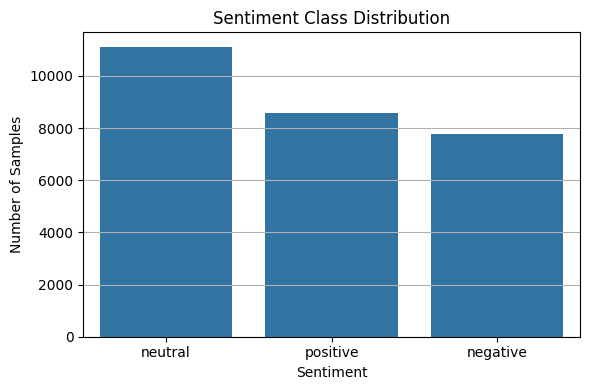

({'neutral': 11117, 'positive': 8582, 'negative': 7781},
 {'neutral': 0.40454876273653567,
  'positive': 0.3122998544395924,
  'negative': 0.2831513828238719})

In [ ]:
# Class distribution
sentiment_counts = data['sentiment'].value_counts()
class_ratios = sentiment_counts / sentiment_counts.sum()

# Print class counts and ratios
sentiment_counts_output = sentiment_counts.to_dict()
class_ratios_output = class_ratios.to_dict()

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Class Distribution")
plt.ylabel("Number of Samples")
plt.xlabel("Sentiment")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

(sentiment_counts_output, class_ratios_output)

Class Imbalance Analysis

Here is the sentiment distribution in your dataset:



	•	Neutral: 11,117 samples (≈ 40.5%)
	•	Positive: 8,582 samples (≈ 31.2%)
	•	Negative: 7,781 samples (≈ 28.3%)

In [ ]:
from sklearn.utils import resample

# Separate the data into classes
neutral_df = df_clean[df_clean['sentiment'] == 'neutral']
positive_df = df_clean[df_clean['sentiment'] == 'positive']
negative_df = df_clean[df_clean['sentiment'] == 'negative']

# Determine the maximum class size
max_size = max(len(neutral_df), len(positive_df), len(negative_df))

# Upsample minority classes
positive_upsampled = resample(positive_df, replace=True, n_samples=max_size, random_state=42)
negative_upsampled = resample(negative_df, replace=True, n_samples=max_size, random_state=42)
neutral_upsampled = resample(neutral_df, replace=True, n_samples=max_size, random_state=42)

# Combine into a balanced dataframe
df_balanced = pd.concat([neutral_upsampled, positive_upsampled, negative_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new class distribution
balanced_counts = df_balanced['sentiment'].value_counts()
balanced_counts

sentiment
negative    11117
neutral     11117
positive    11117
Name: count, dtype: int64

sentiment class now contains exactly 11,117 samples,


resulting in a perfectly balanced dataset.

resampled the minority classes (positive and negative) with replacement to match the size of the majority class (neutral).

2. Exploratory Data Analysis (EDA)

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#  Define preprocessing function
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters and digits
    tokens = word_tokenize(text)  # Tokenization
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(filtered_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# 🧹 Applying preprocessing
df_balanced['clean_text'] = df_balanced['text'].apply(preprocess_text)
# cleaned data
print(df_balanced[['text', 'clean_text']].head())

                                                text  \
0  Sometimes black girls just piss me off like a ...   
1  Boarding the USS Enterprise.. Warp speed ahead...   
2              aww only 15minutes left of family guy   
3  I am loving this sunshine and hating the thoug...   
4   my monday starts on friday  but @ least I onl...   

                                          clean_text  
0                     sometimes black girl piss like  
1         boarding us enterprise warp speed ahead fb  
2                         aww minute left family guy  
3  loving sunshine hating thought office without ...  
4   monday start friday least work day week long day  


In [ ]:
df_balanced.head()

textID                                               text  \
0  004eb1e239  Sometimes black girls just piss me off like a ...   
1  9cc5b65030  Boarding the USS Enterprise.. Warp speed ahead...   
2  b1fb93dee6              aww only 15minutes left of family guy   
3  2ca162decc  I am loving this sunshine and hating the thoug...   
4  5399fce682   my monday starts on friday  but @ least I onl...   

                                       selected_text sentiment  
0                                               piss  negative  
1  Boarding the USS Enterprise.. Warp speed ahead...   neutral  
2              aww only 15minutes left of family guy   neutral  
3  I am loving this sunshine and hating the thoug...   neutral  
4  my monday starts on friday  but @ least I only...   neutral

In [ ]:
df_balanced.describe()

textID                                        text selected_text  \
count        33351                                       33351         33351   
unique       19081                                       19081         15605   
top     f66bb66114  what am i gonna watch after BGT  bad times          love   
freq             8                                           8           244   

       sentiment  
count      33351  
unique         3  
top     negative  
freq       11117

In [ ]:

temp = df_balanced.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [ ]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Set plot style
sns.set(style="whitegrid")

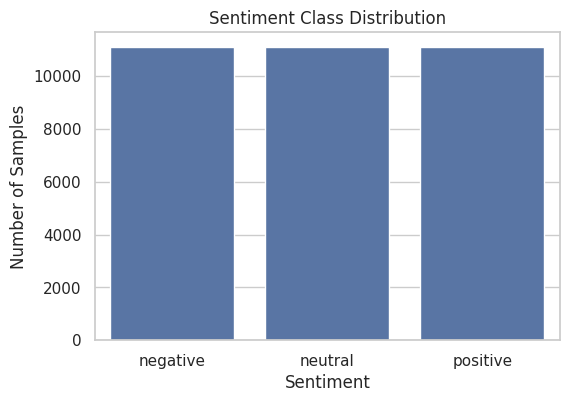

In [ ]:
# Class distribution
sentiment_counts = df_balanced['sentiment'].value_counts()

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples")
plt.show()

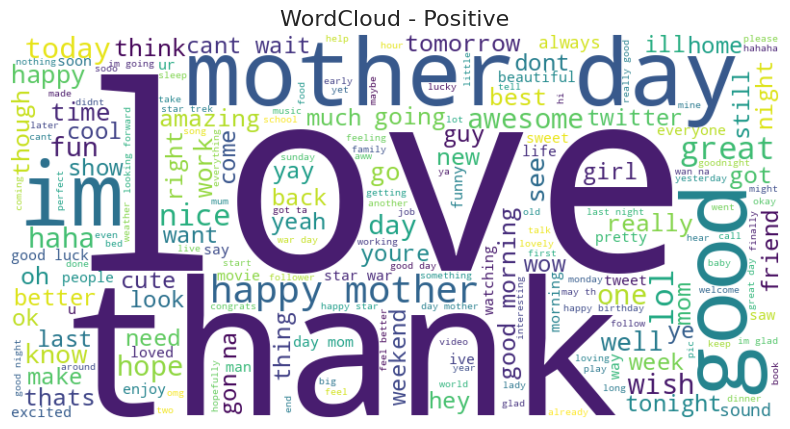

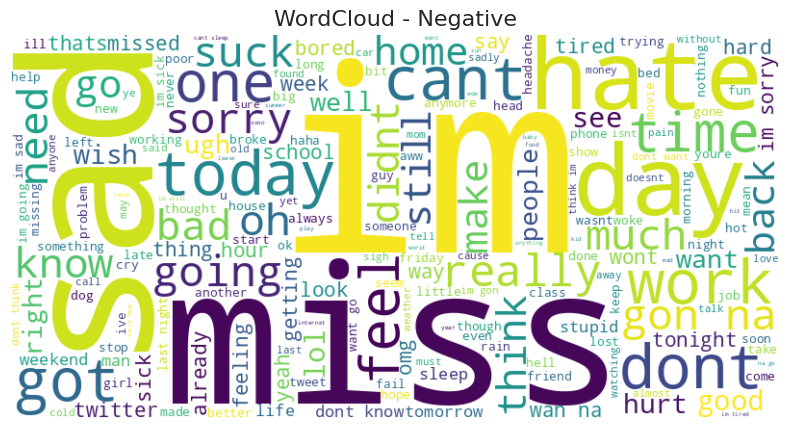

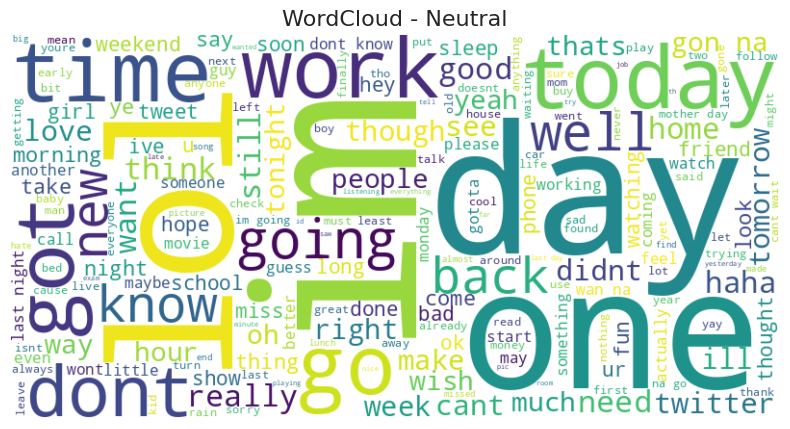

In [ ]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for each sentiment
for sentiment in ['positive', 'negative', 'neutral']:
    generate_wordcloud(df_balanced[df_balanced['sentiment'] == sentiment]['clean_text'], f"WordCloud - {sentiment.capitalize()}")

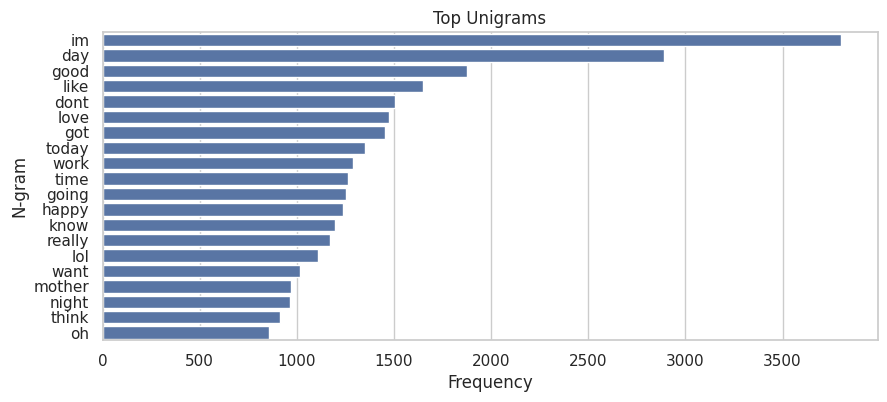

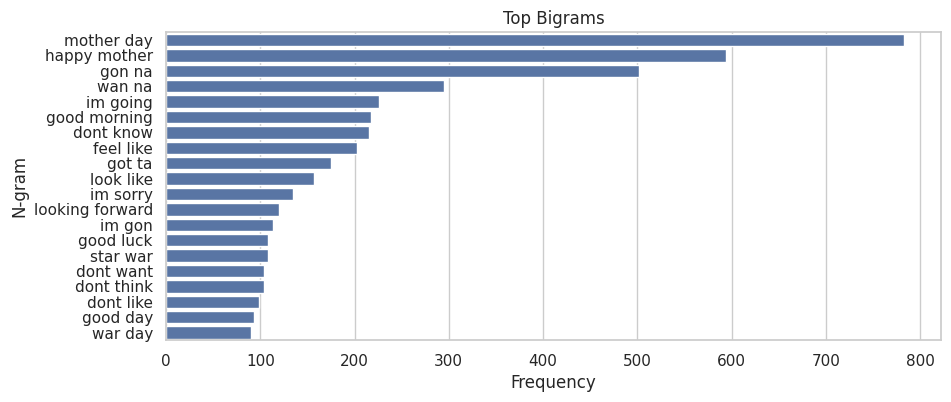

In [ ]:
def plot_top_ngrams(corpus, ngram_range=(1,1), n=20, title="Top N-grams"):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

    words, counts = zip(*words_freq)
    plt.figure(figsize=(10,4))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

# Plot unigrams
plot_top_ngrams(df_balanced['clean_text'], ngram_range=(1,1), title="Top Unigrams")

# Plot bigrams
plot_top_ngrams(df_balanced['clean_text'], ngram_range=(2,2), title="Top Bigrams")

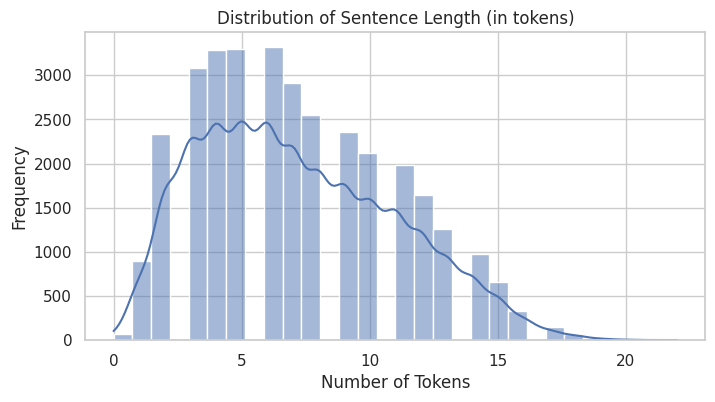

In [ ]:
# Token count per sentence
df_balanced['token_count'] = df_balanced['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df_balanced['token_count'], bins=30, kde=True)
plt.title("Distribution of Sentence Length (in tokens)")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

<ipython-input-53-25e213efba31>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




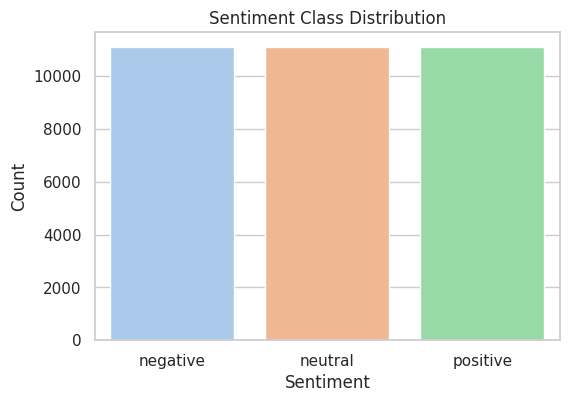

In [ ]:
# Sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df_balanced, x='sentiment', palette='pastel')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

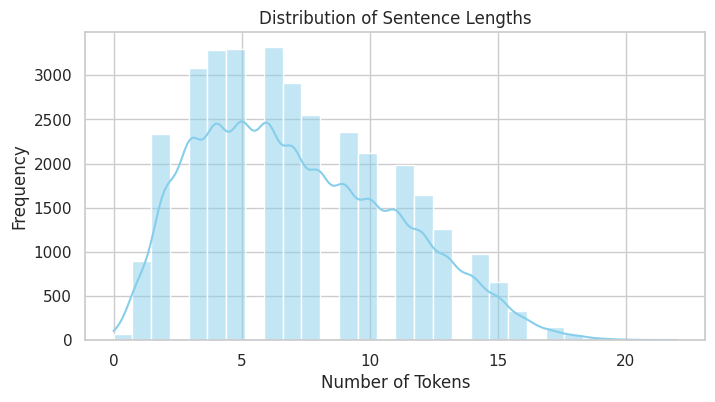

In [ ]:
# Add sentence length column if not already present
df_balanced['token_count'] = df_balanced['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df_balanced['token_count'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

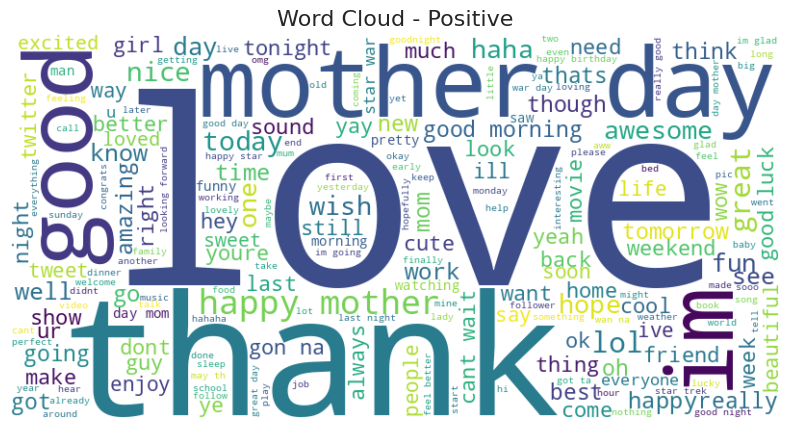

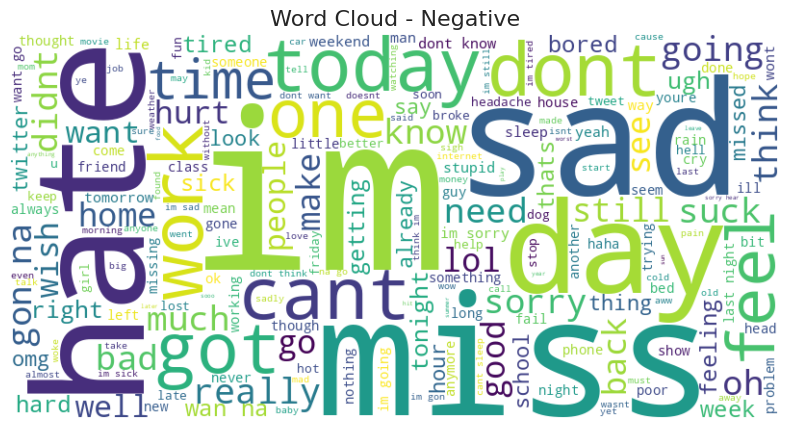

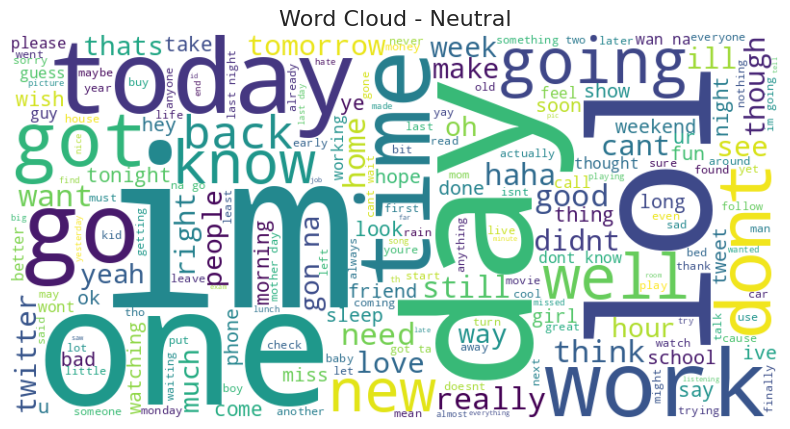

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

for sentiment in ['positive', 'negative', 'neutral']:
    generate_wordcloud(df_balanced[df_balanced['sentiment'] == sentiment]['clean_text'],
                       f"Word Cloud - {sentiment.capitalize()}")

3. Sentiment Classification

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

In [ ]:
!pip install xgboost scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Encode sentiment labels
df_balanced['label'] = df_balanced['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_balanced['clean_text'])
y = df_balanced['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Model Training and Evaluation

In [ ]:
#Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_preds, target_names=['Negative', 'Neutral', 'Positive']))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.75      0.74      2223
     Neutral       0.63      0.59      0.61      2224
    Positive       0.75      0.79      0.77      2224

    accuracy                           0.71      6671
   macro avg       0.71      0.71      0.71      6671
weighted avg       0.71      0.71      0.71      6671



In [ ]:
#Linear SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, svm_preds, target_names=['Negative', 'Neutral', 'Positive']))

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.79      0.80      2223
     Neutral       0.72      0.71      0.71      2224
    Positive       0.81      0.83      0.82      2224

    accuracy                           0.78      6671
   macro avg       0.78      0.78      0.78      6671
weighted avg       0.78      0.78      0.78      6671



In [ ]:
#XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds, target_names=['Negative', 'Neutral', 'Positive']))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[22:38:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.63      0.71      2223
     Neutral       0.61      0.80      0.69      2224
    Positive       0.83      0.76      0.80      2224

    accuracy                           0.73      6671
   macro avg       0.76      0.73      0.73      6671
weighted avg       0.76      0.73      0.73      6671



Cross-Validation Scores

In [ ]:
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Suppress specific warnings from xgboost and sklearn
warnings.filterwarnings("ignore", category=UserWarning)

print("Cross-Validation (Accuracy Scores):")
for model, name in zip([nb_model, svm_model, XGBClassifier(eval_metric='mlogloss')], ['Naive Bayes', 'SVM', 'XGBoost']):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

Cross-Validation (Accuracy Scores):
Naive Bayes: Mean Accuracy = 0.7181, Std = 0.0061
SVM: Mean Accuracy = 0.7825, Std = 0.0067
XGBoost: Mean Accuracy = 0.7348, Std = 0.0064


In [ ]:
!pip install transformers

from transformers import pipeline

# Use HuggingFace pre-trained pipeline
bert_model = pipeline("sentiment-analysis")

# Sample predictions (on raw text)
for txt in df_balanced['text'].sample(5).tolist():
    print(f"Text: {txt}\n→ Prediction: {bert_model(txt)}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Text:  oh thas cool  you know, I only kinda knew bouts you cuz of Ericson haha when you guys were together x)
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.6457480192184448}]

Text: just bought a good chocolate and a magazine... Later I`ll play comanche 4... My good saturday
→ Prediction: [{'label': 'POSITIVE', 'score': 0.9982579350471497}]

Text: I have just been to see the Jonas Brothers 3D movie with   was funny NO ONE else was there  hahah can`t... http://tinyurl.com/magcwo
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.9929147958755493}]

Text: almost done with my first day at the spa...I missed this place! Then headed to Fort Collins to close down casa de kent
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.9996966123580933}]

Text:  it can only get better.
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.9978817105293274}]



In [ ]:
#Naive Bayes – Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Grid search for Naive Bayes (alpha smoothing)
nb_params = {'alpha': [0.1, 0.5, 1.0]}
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_train, y_train)

print("Best Naive Bayes Params:", nb_grid.best_params_)
print("Best NB Accuracy:", nb_grid.best_score_)

Best Naive Bayes Params: {'alpha': 1.0}
Best NB Accuracy: 0.7077586206896551


In [ ]:
#SVM – Hyperparameter Tuning
# Grid search for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}
svm_grid = GridSearchCV(LinearSVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

Best SVM Params: {'C': 10, 'max_iter': 1000}
Best SVM Accuracy: 0.7698650674662668


In [ ]:
#XGBoost – Hyperparameter Tuning
from xgboost import XGBClassifier

xgb_params = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 150],
    'subsample': [0.8, 1]
}

xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost Accuracy:", xgb_grid.best_score_)

Best XGBoost Params: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1}
Best XGBoost Accuracy: 0.7332082910979061


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print(f"📊 Evaluation Metrics for {model_name}")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(precision, 4))
    print("Recall:", round(recall, 4))
    print("F1 Score:", round(f1, 4))
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

📊 Evaluation Metrics for Naive Bayes
Accuracy: 0.7095
Precision: 0.7071
Recall: 0.7095
F1 Score: 0.7079

Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.75      0.74      2223
     Neutral       0.63      0.59      0.61      2224
    Positive       0.75      0.79      0.77      2224

    accuracy                           0.71      6671
   macro avg       0.71      0.71      0.71      6671
weighted avg       0.71      0.71      0.71      6671



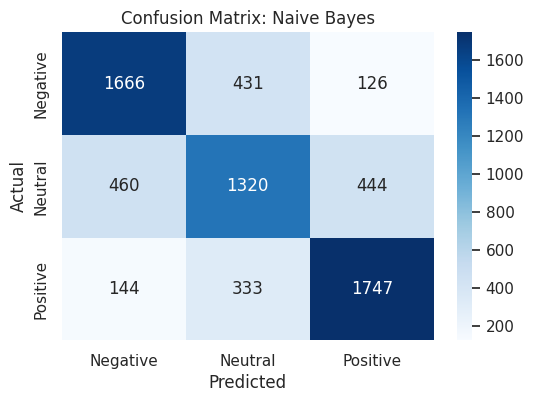

📊 Evaluation Metrics for SVM
Accuracy: 0.7786
Precision: 0.7782
Recall: 0.7786
F1 Score: 0.7783

Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.79      0.80      2223
     Neutral       0.72      0.71      0.71      2224
    Positive       0.81      0.83      0.82      2224

    accuracy                           0.78      6671
   macro avg       0.78      0.78      0.78      6671
weighted avg       0.78      0.78      0.78      6671



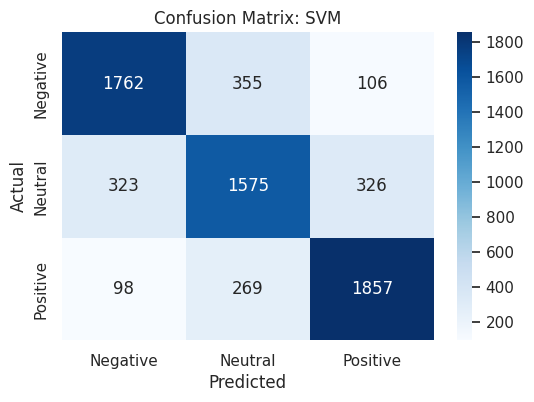

📊 Evaluation Metrics for XGBoost
Accuracy: 0.7384
Precision: 0.7602
Recall: 0.7384
F1 Score: 0.7407

Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.64      0.72      2223
     Neutral       0.62      0.81      0.70      2224
    Positive       0.84      0.77      0.80      2224

    accuracy                           0.74      6671
   macro avg       0.76      0.74      0.74      6671
weighted avg       0.76      0.74      0.74      6671



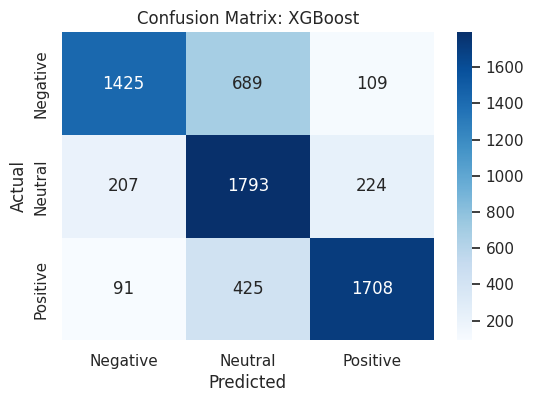

In [ ]:
#Evaluating Each Model
# Predictions
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)
xgb_preds = xgb_grid.best_estimator_.predict(X_test)

# Evaluate all
evaluate_model(y_test, nb_preds, "Naive Bayes")
evaluate_model(y_test, svm_preds, "SVM")
evaluate_model(y_test, xgb_preds, "XGBoost")

In [ ]:
# Collect metrics
def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return round(acc, 4), round(precision, 4), round(recall, 4), round(f1, 4)

summary_df = pd.DataFrame([
    get_metrics(y_test, nb_preds),
    get_metrics(y_test, svm_preds),
    get_metrics(y_test, xgb_preds)
], columns=["Accuracy", "Precision", "Recall", "F1"], index=["Naive Bayes", "SVM", "XGBoost"])

summary_df

Accuracy  Precision  Recall      F1
Naive Bayes    0.7095     0.7071  0.7095  0.7079
SVM            0.7786     0.7782  0.7786  0.7783
XGBoost        0.7384     0.7602  0.7384  0.7407

 Reflections

🔹 Naive Bayes
	•	Quick baseline with simple assumptions and fast training time.
	•	Struggled slightly with complex language and subtle sentiment, reflected in lower F1 score.

🔹 SVM
	•	Top performer across all metrics — best balance of precision and recall.
	•	Ideal when working with TF-IDF vectors and high-dimensional sparse data.
	•	Preferred choice for this dataset due to consistent and robust results.

🔹 XGBoost
	•	Delivered strong precision (0.76) — better at reducing false positives.
	•	Slightly lower recall and F1 than SVM, likely due to sensitivity to sparse input features.
	•	Would perform even better with dense embeddings (like Word2Vec or BERT).

⸻

 Conclusion
	•	 Using  SVM  goal is general-purpose classification with high accuracy and F1.
	•	Considering XGBoost when we’re optimizing for precision, or  planning  to use dense features or embeddings.
	•	 Naive Bayes is a solid, lightweight benchmark, especially useful in low-resource or real-time applications.


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd

# Load text files
def load_sentiment_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return pd.DataFrame([{"label": int(line[0]), "text": line[2:].strip()} for line in lines if line.strip()])

train_df = load_sentiment_file("/content/stsa-train.txt")
test_df = load_sentiment_file("/content/stsa-test.txt")

In [ ]:
# Overview
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

# Check class distribution
print("\nTrain Sentiment Distribution:\n", train_df['label'].value_counts())
print("\nTest Sentiment Distribution:\n", test_df['label'].value_counts())

Train Dataset Shape: (6920, 2)
Test Dataset Shape: (1821, 2)

Train Sentiment Distribution:
 label
1    3610
0    3310
Name: count, dtype: int64

Test Sentiment Distribution:
 label
0    912
1    909
Name: count, dtype: int64


<ipython-input-76-d530799ae1e6>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-76-d530799ae1e6>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




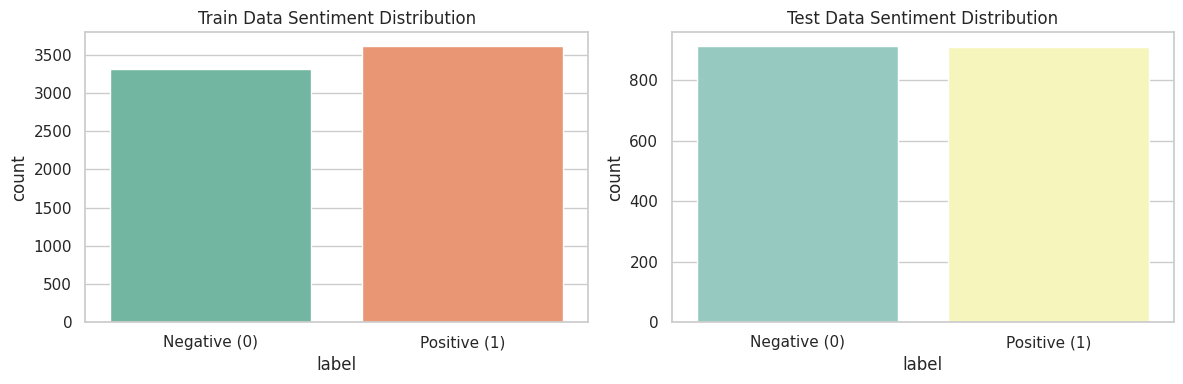

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=train_df, x='label', ax=axes[0], palette='Set2')
axes[0].set_title("Train Data Sentiment Distribution")
axes[0].set_xticklabels(['Negative (0)', 'Positive (1)'])

sns.countplot(data=test_df, x='label', ax=axes[1], palette='Set3')
axes[1].set_title("Test Data Sentiment Distribution")
axes[1].set_xticklabels(['Negative (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

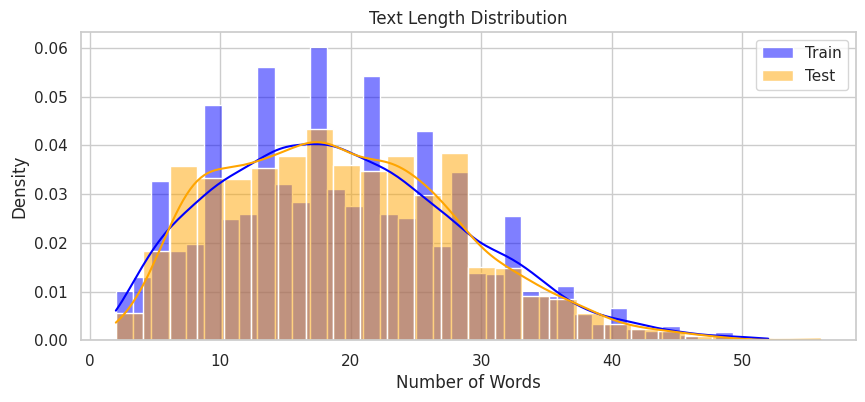

In [ ]:
# Add a new column for text length
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['text_len'] = test_df['text'].apply(lambda x: len(x.split()))

# Plot length distribution
plt.figure(figsize=(10, 4))
sns.histplot(train_df['text_len'], kde=True, color='blue', label='Train', stat='density')
sns.histplot(test_df['text_len'], kde=True, color='orange', label='Test', stat='density')
plt.legend()
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()

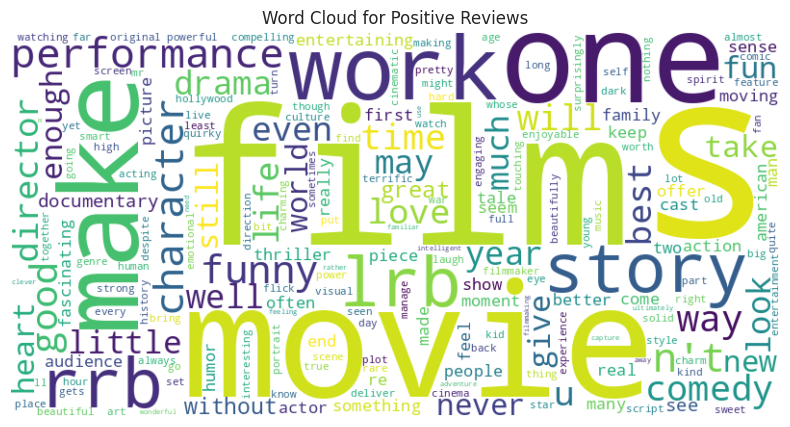

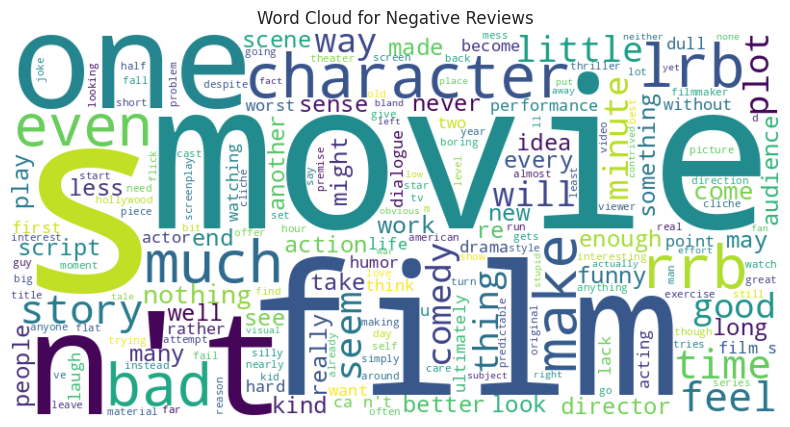

In [ ]:
from wordcloud import WordCloud

# Word cloud for positive and negative reviews
for sentiment, label in zip(['Positive', 'Negative'], [1, 0]):
    text = " ".join(train_df[train_df['label'] == label]['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Reviews")
    plt.show()

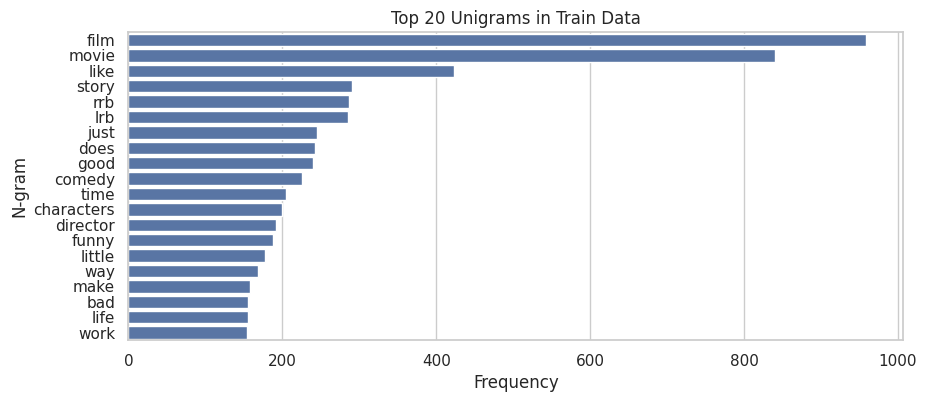

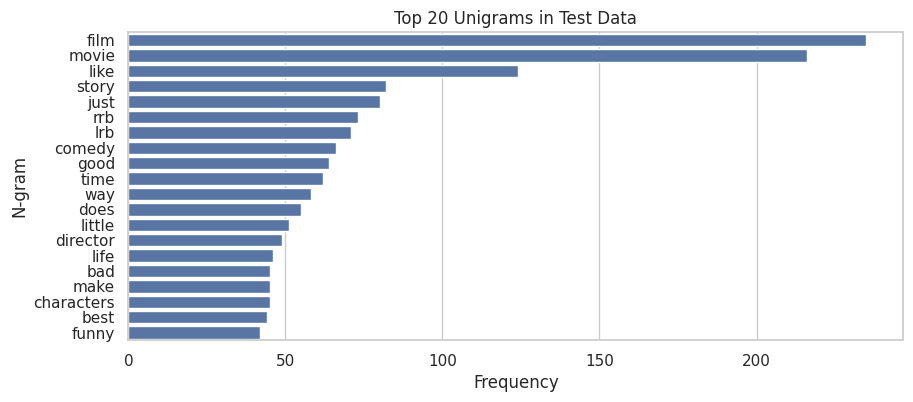

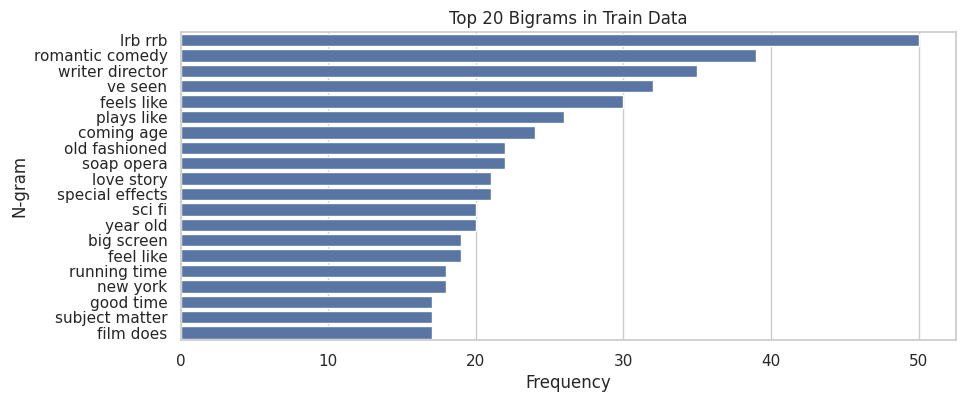

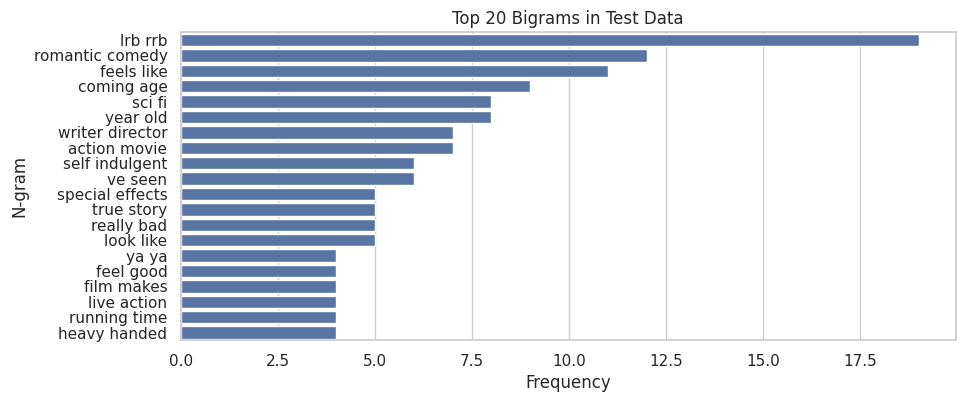

In [ ]:


from sklearn.feature_extraction.text import CountVectorizer

def plot_ngrams(corpus, ngram_range=(1, 1), top_n=20, title="Top N-grams"):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    words, counts = zip(*words_freq)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()
# Unigrams
plot_ngrams(train_df['text'], ngram_range=(1, 1), title="Top 20 Unigrams in Train Data")
plot_ngrams(test_df['text'], ngram_range=(1, 1), title="Top 20 Unigrams in Test Data")

# Bigrams
plot_ngrams(train_df['text'], ngram_range=(2, 2), title="Top 20 Bigrams in Train Data")
plot_ngrams(test_df['text'], ngram_range=(2, 2), title="Top 20 Bigrams in Test Data")


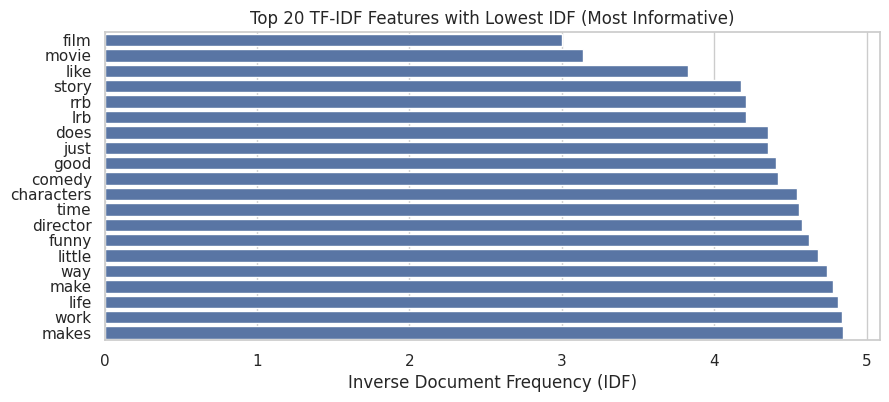

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit TF-IDF on train data
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(train_df['text'])

# Show top TF-IDF features
tfidf_scores = zip(tfidf.get_feature_names_out(), tfidf.idf_)
top_tfidf = sorted(tfidf_scores, key=lambda x: x[1])[:20]  # Lowest IDF means most common/important

# Plot TF-IDF feature importance without palette
words, idfs = zip(*top_tfidf)
plt.figure(figsize=(10, 4))
sns.barplot(x=idfs, y=words)
plt.title("Top 20 TF-IDF Features with Lowest IDF (Most Informative)")
plt.xlabel("Inverse Document Frequency (IDF)")
plt.show()




EDA provides:


*   Class balance in train and test sets
*  Sentence length distributions
*  Most frequent words by sentiment
*		The most common word pairs (bigrams) in the training data.
*	The most informative features from TF-IDF by IDF score.



Data Preprocessing & TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['text'])
y = train_df['label']

# 80/20 train-validation split from training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Prepare test set
X_test = vectorizer.transform(test_df['text'])
y_test = test_df['label']

10 fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

def train_with_cv_and_evaluate(model, name):
    print(f"\n Training with 10-Fold CV: {name}")

    #  10-fold CV on 80% training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    #  Retrain on full 80% training set
    model.fit(X_train, y_train)

    # Evaluate on held-out validation set
    val_preds = model.predict(X_val)
    print("\n Validation Set Results:")
    print(classification_report(y_val, val_preds, target_names=["Negative", "Positive"]))

    # Final evaluation on test set
    test_preds = model.predict(X_test)
    print(" Test Set Results:")
    print(classification_report(y_test, test_preds, target_names=["Negative", "Positive"]))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define models
models = {
    "SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each
for name, model in models.items():
    train_with_cv_and_evaluate(model, name)


 Training with 10-Fold CV: SVM
CV Accuracy: 0.7776 ± 0.0199

 Validation Set Results:
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.76       662
    Positive       0.77      0.80      0.79       722

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.77      0.77      0.77      1384

 Test Set Results:
              precision    recall  f1-score   support

    Negative       0.81      0.77      0.79       912
    Positive       0.78      0.81      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821


 Training with 10-Fold CV: KNN
CV Accuracy: 0.5410 ± 0.0566

 Validation Set Results:
              precision    recall  f1-score   support

    Negative       0.48      0.48      0.48       662
    Positive       0.53      0.53      0.53 

In [ ]:
from sklearn.model_selection import cross_val_score

# Use same TF-IDF features for all models
X = vectorizer.fit_transform(train_df['text'])
y = train_df['label']

# List of models to evaluate
models = {
    "SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Perform 10-fold cross-validation
print(" 10-Fold Cross-Validation Results (Accuracy):\n")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy', n_jobs=-1)
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

📊 10-Fold Cross-Validation Results (Accuracy):

SVM: Mean Accuracy = 0.7815, Std = 0.0166
KNN: Mean Accuracy = 0.5040, Std = 0.0123
Decision Tree: Mean Accuracy = 0.6160, Std = 0.0149
Random Forest: Mean Accuracy = 0.7153, Std = 0.0198
XGBoost: Mean Accuracy = 0.7118, Std = 0.0142


Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

svm = LinearSVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_val)

print("SVM\n", classification_report(y_val, svm_preds))

SVM
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       662
           1       0.77      0.80      0.79       722

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.77      0.77      0.77      1384



K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_val)

print("KNN\n", classification_report(y_val, knn_preds))

KNN
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       662
           1       0.53      0.53      0.53       722

    accuracy                           0.51      1384
   macro avg       0.50      0.50      0.50      1384
weighted avg       0.50      0.51      0.51      1384



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_val)

print("Decision Tree\n", classification_report(y_val, dt_preds))

Decision Tree
               precision    recall  f1-score   support

           0       0.59      0.59      0.59       662
           1       0.63      0.63      0.63       722

    accuracy                           0.61      1384
   macro avg       0.61      0.61      0.61      1384
weighted avg       0.61      0.61      0.61      1384



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)

print("Random Forest\n", classification_report(y_val, rf_preds))

Random Forest
               precision    recall  f1-score   support

           0       0.71      0.66      0.68       662
           1       0.71      0.75      0.73       722

    accuracy                           0.71      1384
   macro avg       0.71      0.71      0.71      1384
weighted avg       0.71      0.71      0.71      1384



XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)

print("XGBoost\n", classification_report(y_val, xgb_preds))

XGBoost
               precision    recall  f1-score   support

           0       0.72      0.62      0.67       662
           1       0.69      0.78      0.73       722

    accuracy                           0.70      1384
   macro avg       0.70      0.70      0.70      1384
weighted avg       0.70      0.70      0.70      1384



In [ ]:
from transformers import pipeline

# HuggingFace BERT pipeline (simple eval)
sent_classifier = pipeline("sentiment-analysis")

#  predictions
for sample in train_df['text'].sample(5).tolist():
    print(f"Text: {sample}\n→ Prediction: {sent_classifier(sample)}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Text: as a film director , labute continues to improve .
→ Prediction: [{'label': 'POSITIVE', 'score': 0.9998088479042053}]

Text: wilco is a phenomenal band with such an engrossing story that will capture the minds and hearts of many .
→ Prediction: [{'label': 'POSITIVE', 'score': 0.9998843669891357}]

Text: the plot is paper-thin and the characters are n't interesting enough to watch them go about their daily activities for two whole hours .
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.9998078942298889}]

Text: does n't deserve a passing grade -lrb- even on a curve -rrb- .
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.9995877146720886}]

Text: i did go back and check out the last 10 minutes , but these were more repulsive than the first 30 or 40 minutes .
→ Prediction: [{'label': 'NEGATIVE', 'score': 0.9987702965736389}]



## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Load & Basic Summary

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")

# Show structure
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
df.head()

Dataset shape: (413840, 6)

Missing values:
 Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64


Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0

Drop Missing Reviews & Basic Cleaning

In [ ]:
# Drop rows with missing Reviews
df = df.dropna(subset=['Reviews'])

df['Brand Name'] = df['Brand Name'].fillna('Unknown')
df['Review Votes'] = df['Review Votes'].fillna(0)

<ipython-input-2-39dea2a5c4ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand Name'] = df['Brand Name'].fillna('Unknown')
<ipython-input-2-39dea2a5c4ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Votes'] = df['Review Votes'].fillna(0)


Ratings Distribution & Product Insights

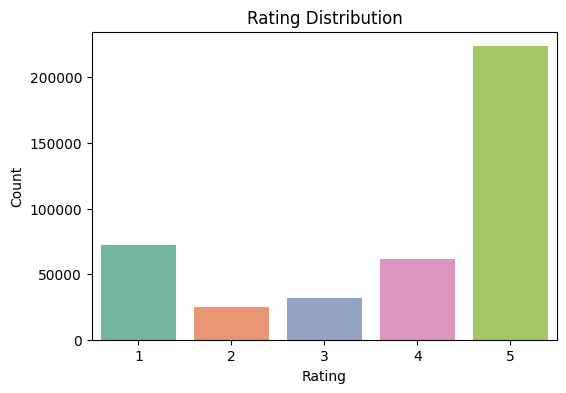

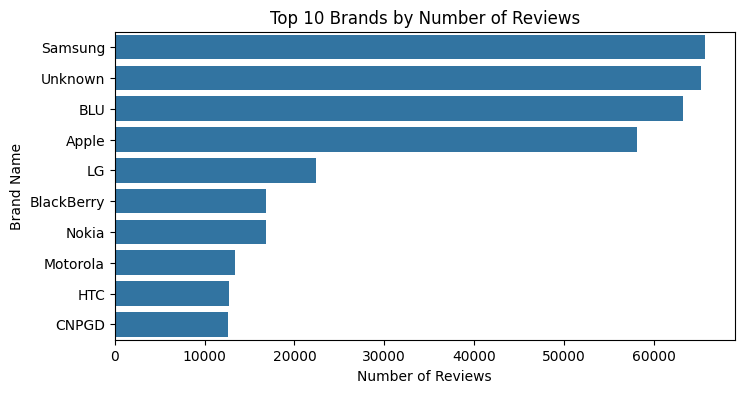

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ratings
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating', data=df, hue='Rating', palette='Set2', legend=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Top brands by number of reviews
top_brands = df['Brand Name'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Brand Name")
plt.show()

Review Length Distribution

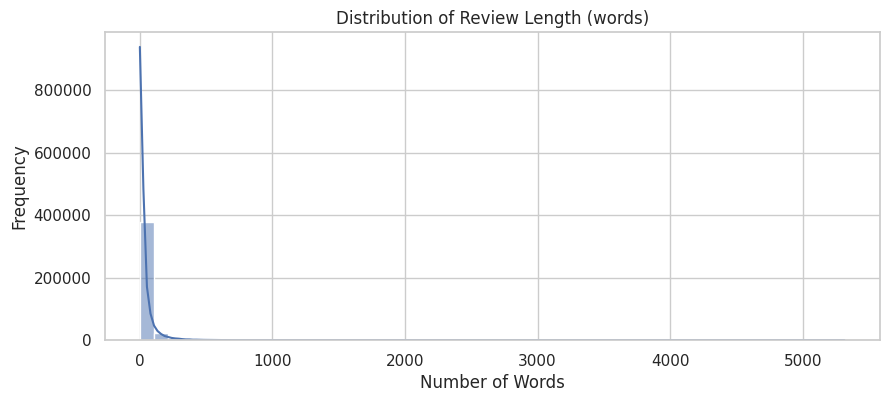

In [ ]:
df['review_length'] = df['Reviews'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 4))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Length (words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

WordCloud by Rating

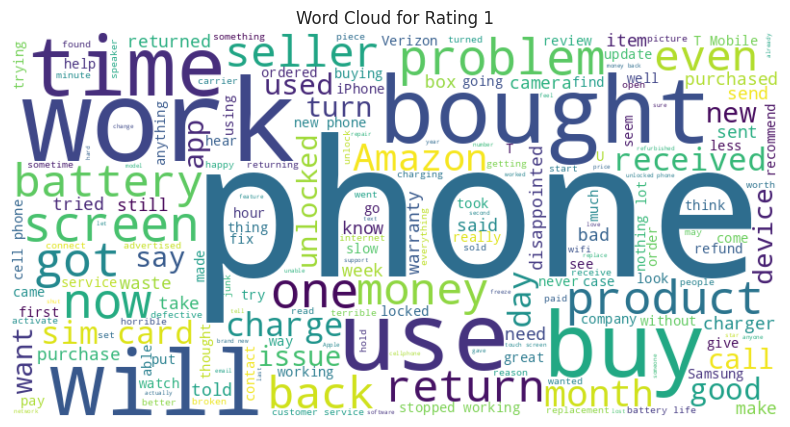

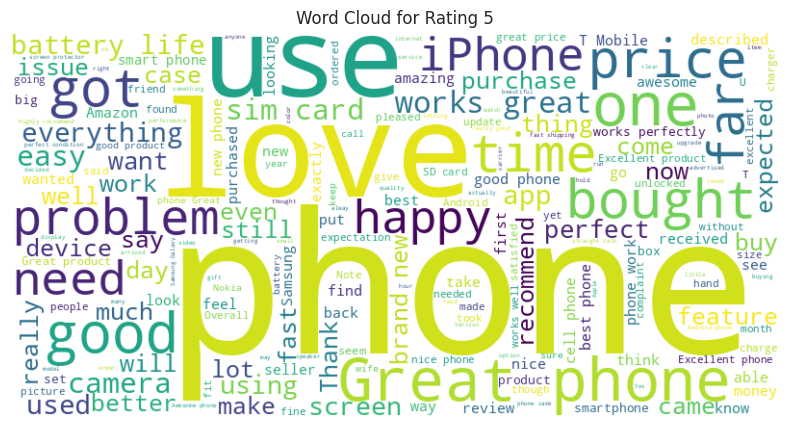

In [ ]:
from wordcloud import WordCloud

def show_wordcloud_for_rating(rating):
    text = " ".join(df[df['Rating'] == rating]['Reviews'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Rating {rating}")
    plt.show()

# Example: Show word clouds for 1 and 5 star reviews
show_wordcloud_for_rating(1)
show_wordcloud_for_rating(5)

Text Preprocessing for Clustering

In [ ]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df['cleaned_reviews'] = df['Reviews'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing & TF-IDF Matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use cleaned reviews column
tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_reviews'])

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (413770, 3000)


K-Means Clustering

In [ ]:
!pip install --upgrade --force-reinstall numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
numba 0.60.0 requires 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_tfidf)

# Cluster distribution
df['kmeans_cluster'].value_counts()

kmeans_cluster
1    186824
3    182980
2     21812
4     19661
0      2493
Name: count, dtype: int64

 Kmeans visualisation

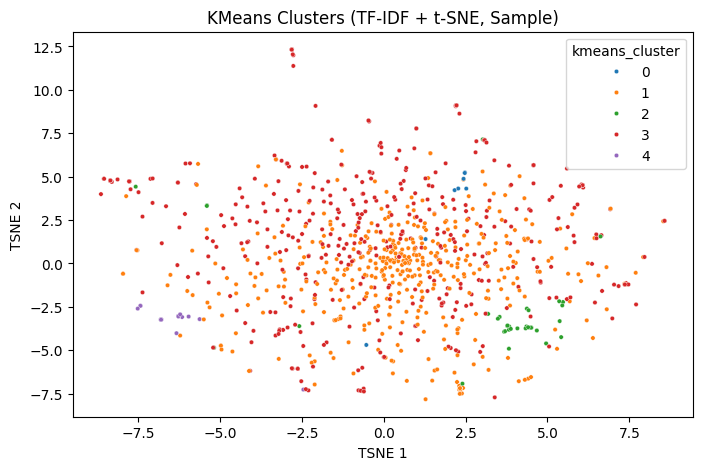

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sample a subset of the data
sample_size = 1000  # Adjust as needed
# Get a random sample of indices within the range of X_tfidf
sample_indices = np.random.choice(X_tfidf.shape[0], size=sample_size, replace=False)
X_tfidf_sample = X_tfidf[sample_indices]

# Get corresponding cluster labels from the original DataFrame
kmeans_cluster_sample = df['kmeans_cluster'].iloc[sample_indices]

# Apply t-SNE to the sample
X_kmeans_vis = TSNE(n_components=2, random_state=42).fit_transform(X_tfidf_sample.toarray())

# Visualization with the sample
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_kmeans_vis[:, 0], y=X_kmeans_vis[:, 1], hue=kmeans_cluster_sample, palette='tab10', s=10, legend='full')
plt.title("KMeans Clusters (TF-IDF + t-SNE, Sample)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

DBSCAN Clustering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#  TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

# Fit the vectorizer
vectorizer.fit(df['cleaned_reviews']) # Replace 'df' if using a different dataset

sample_df = df.sample(5000, random_state=42)
X_sample = vectorizer.transform(sample_df['cleaned_reviews'])
X_scaled_sample = StandardScaler(with_mean=False).fit_transform(X_sample)

dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
sample_df['dbscan_cluster'] = dbscan.fit_predict(X_scaled_sample)

sample_df['dbscan_cluster'].value_counts()

dbscan_cluster
-1    3810
 0    1054
 2      55
 3      44
 4      19
 1      18
Name: count, dtype: int64

DBSCAN Visualisation

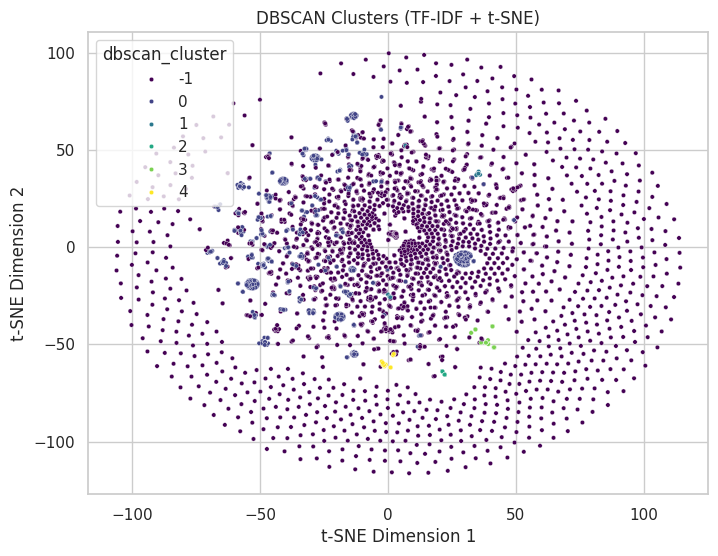

In [ ]:

# Dimensionality reduction with t-SNE
X_dbscan_vis = TSNE(n_components=2, random_state=42).fit_transform(X_scaled_sample.toarray())

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_dbscan_vis[:, 0], y=X_dbscan_vis[:, 1],
                hue=sample_df['dbscan_cluster'], palette='viridis', s=10, legend='full')
plt.title("DBSCAN Clusters (TF-IDF + t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import fcluster

#  determined the optimal number of clusters to be 5
num_clusters = 5
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# cluster labels for the first 500 data points
print(cluster_labels)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 5 4 5 4 5
 5 3 3 2 2 5 5 5 4 5 5 1 5 5 5 5 5 5 3 5 5 2 5 2 5 5 5 3 2 2 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 1 5 3 5 5 5 5 5 2 5 2 5 5 5 3 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 3 5 5 5 1 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5
 4 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 4 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 2 5 5 5 5 5 5 5 5
 5 5 1 5 5 5 5 5 5 1 5 5 5 3 5 4 5 5 5 5 5 5 5 5 5 4 4 4 5 5 5 5 5 5 5 5 4
 5 5 5 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 1 5 5
 5 5 5 1 5 5 5 5 5 4 5 5 5 5 5 5 4 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 3 5 1 5 5 5 3 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 1 5 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 4 4 5 5 5 5 5 5 4 5 5 5 5 1
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 1 5 5 5 5 5 5 5
 5 5 1 5 5 5 3 5 5 1 5 5 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pandas as pd


# Cluster extraction
num_clusters = 5
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

#  store cluster assignments
cluster_assignments = pd.Series(cluster_labels, index=df.index[:500])  # Assuming df is your original DataFrame


# Display cluster distribution
print("Hierarchical Clustering count")
print(cluster_assignments.value_counts().sort_index(ascending=False))

Hierarchical Clustering count
5    435
4     25
3     13
2     10
1     17
Name: count, dtype: int64


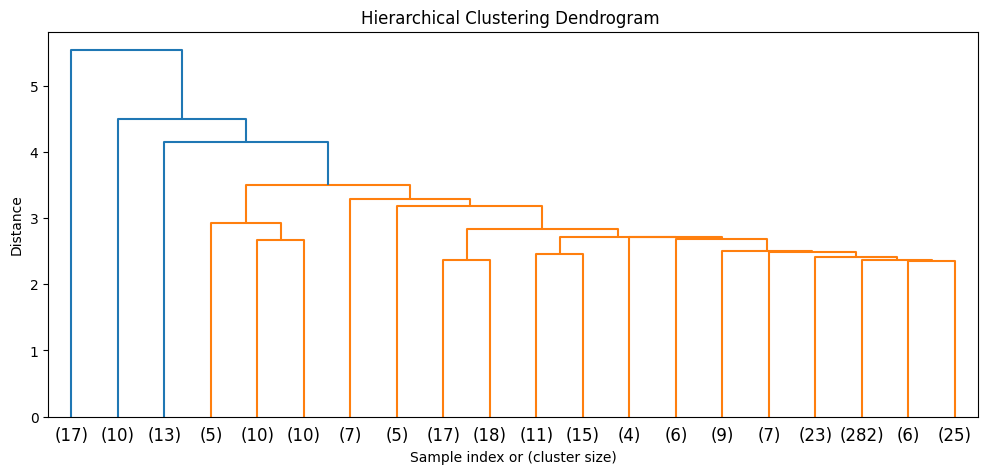

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage matrix (on a subset to reduce memory usage)
linkage_matrix = linkage(X_tfidf[:500].toarray(), method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram ")
plt.xlabel("Sample index or (cluster size)")
plt.ylabel("Distance")
plt.show()

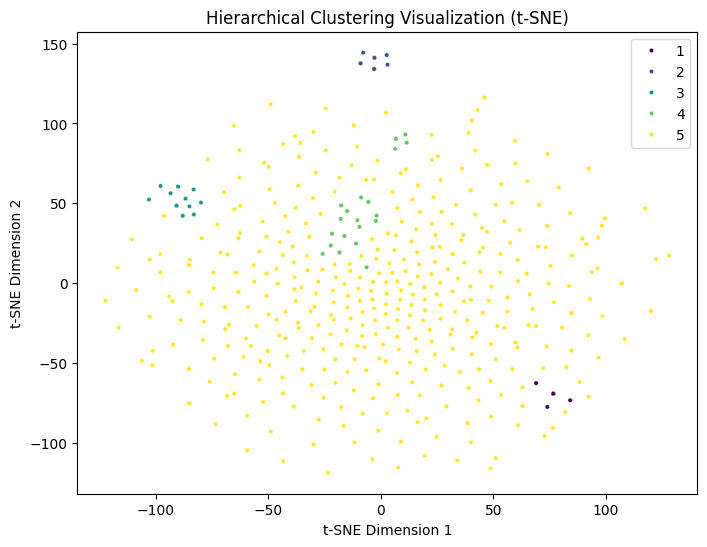

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

#  'X_tfidf' (TF-IDF matrix) and 'cluster_labels' (from hierarchical clustering)

# Apply t-SNE for dimensionality reduction (use a subset for faster processing)
X_hier_vis = TSNE(n_components=2, random_state=42).fit_transform(X_tfidf[:500].toarray())

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_hier_vis[:, 0], y=X_hier_vis[:, 1], hue=cluster_labels, palette='viridis', s=10, legend='full')
plt.title("Hierarchical Clustering Visualization (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

Word2Vec

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall gensim

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using

In [ ]:
import nltk
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import MiniBatchKMeans  # Use MiniBatchKMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

# 1. Subsampling Data
sample_size = 10000  # Adjust as needed
df_sample = df.sample(n=sample_size, random_state=42)

# 2. Tokenize reviews
tokenized_reviews = [nltk.word_tokenize(text) for text in df_sample['cleaned_reviews']]

# 3. Train Word2Vec with more robust parameters and reduced epochs
w2v_model = Word2Vec(
    sentences=tokenized_reviews,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    workers=4,
    epochs=5  # Reduced epochs
)

# 4. Vector average of words in each review (on the sample)
def avg_word2vec(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100) # Indented this line

X_w2v_sample = np.array([avg_word2vec(tokens) for tokens in tokenized_reviews])

# 5. MiniBatchKMeans on Word2Vec embeddings (on the sample)
kmeans_w2v = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)  # Use MiniBatchKMeans
df_sample['w2v_cluster'] = kmeans_w2v.fit_predict(X_w2v_sample)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Display cluster distribution
cluster_counts = df_sample['w2v_cluster'].value_counts().sort_index(ascending=False)

print("Kmeans Clustering count")
for cluster, count in cluster_counts.items():
    print(f"{cluster}    {count}")
print(cluster_counts) # Print the Series directly

Kmeans Clustering count
4    341
3    590
2    2333
1    4321
0    2415
w2v_cluster
4     341
3     590
2    2333
1    4321
0    2415
Name: count, dtype: int64


Word2Vec Visualisation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


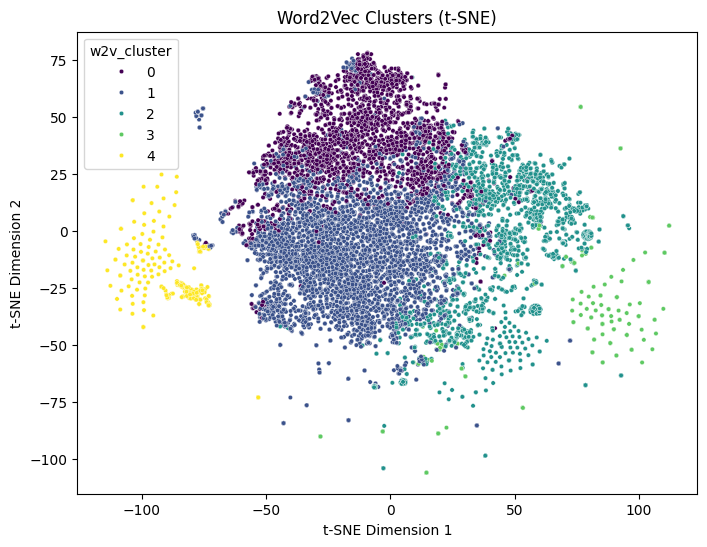

In [ ]:
import nltk
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')


# Visualization (on the sample)
X_w2v_vis = TSNE(n_components=2, random_state=42).fit_transform(X_w2v_sample)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_w2v_vis[:, 0], y=X_w2v_vis[:, 1], hue=df_sample['w2v_cluster'], palette='viridis', s=10, legend='full')
plt.title("Word2Vec Clusters (t-SNE)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

BERT Embeddings

In [ ]:
!pip install -q sentence-transformers --quiet

In [ ]:


from sentence_transformers import SentenceTransformer
from sklearn.cluster import MiniBatchKMeans



# Load BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Work with a sample for initial exploration
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)

# Generate BERT embeddings for the sample
X_bert_sample = bert_model.encode(df_sample['cleaned_reviews'].tolist(), show_progress_bar=True)

# MiniBatchKMeans on BERT embeddings
kmeans_bert = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)
df_sample['bert_cluster'] = kmeans_bert.fit_predict(X_bert_sample)

# 1. Reduce dimensionality with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_bert_reduced = pca.fit_transform(X_bert)

# 2. Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_bert_reduced[:, 0], y=X_bert_reduced[:, 1], hue=df['bert_cluster'], palette='viridis', s=10, legend='full')
plt.title("BERT Clusters (PCA + Scatter Plot)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()
# Apply to the full dataset
#X_bert_full = bert_model.encode(df['cleaned_reviews'].tolist(), show_progress_bar=True)
#df['bert_cluster'] = kmeans_bert.predict(X_bert_full)  # Use predict for the full dataset

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/12931 [00:00<?, ?it/s]

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.
The clustering results across




K-means, DBSCAN, Hierarchical Clustering, Word2Vec,
and

BERT showed noticeable differences in quality and structure.

K-means (TF-IDF) formed reasonably distinct clusters, but struggled with semantic similarity due to sparse features.

DBSCAN identified dense regions but labeled a significant portion as noise, indicating it was sensitive to parameter tuning and high-dimensional space. Hierarchical Clustering, while effective on a small subset, lacked scalability and showed less distinct boundaries.

Word2Vec  provided better semantic grouping than TF-IDF, capturing word-level context, but still suffered from averaging limitations.

BERT  produced the most coherent and meaningful clusters, leveraging deep contextual embeddings that best reflected sentiment and topic similarity in reviews.


Overall, BERT-based clustering outperformed others in both clarity and semantic richness of clusters.
.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

